# Baseline Modelling

# ZeroR Classifier

In [1]:
# load raw data files
import pandas as pd
tf_df  = pd.read_csv("train_features.tsv", sep = '\t')
tl_df = pd.read_csv("train_labels.tsv",  sep = '\t')
vf_df = pd.read_csv("valid_features.tsv",  sep = '\t')
vl_df = pd.read_csv("valid_labels.tsv", sep = '\t')


In [2]:
# create a dictionary to count the number of genres
genres = { 'Action': 0, 'Adventure': 0, 'Animation': 0, 'Children' :0, 'Comedy': 0,  
           'Crime': 0, 'Documentary': 0, 'Drama': 0, 'Fantasy': 0, 'Film_Noir': 0, 
           'Horror': 0, 'Musical': 0, 'Mystery': 0,'Romance': 0, 'Sci_Fi': 0, 
           'Thriller': 0, 'War': 0, 'Western': 0
        }

In [4]:
# count the number of genres in training data set
for i in range(len(tl_df.genres)):
    genre = tl_df.genres[i]
    genres[genre] += 1

In [5]:
# function to get evaluation metrics
from sklearn.metrics import classification_report
def getMetrics(trueLabel, predict):
    print(classification_report(trueLabel, predict,zero_division = 0))

In [6]:
# class distribution in training data set
genres

{'Action': 86,
 'Adventure': 104,
 'Animation': 30,
 'Children': 106,
 'Comedy': 583,
 'Crime': 237,
 'Documentary': 207,
 'Drama': 713,
 'Fantasy': 298,
 'Film_Noir': 78,
 'Horror': 244,
 'Musical': 154,
 'Mystery': 270,
 'Romance': 791,
 'Sci_Fi': 417,
 'Thriller': 598,
 'War': 241,
 'Western': 83}

In [15]:
# calculate accuracy based on the algorithm of ZeroR (the most observed genre is 'Romance')
predict = []
count = 0
total = len(vl_df.genres)
for i in range(total):
    if vl_df.genres[i] == 'Romance':
        count += 1
    predict.append('Romance')
print("Accuracy : ", count/total)


Accuracy :  0.1705685618729097


# Evaluation of ZeroR

In [17]:
# evaluation 
getMetrics(vl_df.genres, predict)

              precision    recall  f1-score   support

      Action       0.00      0.00      0.00         6
   Adventure       0.00      0.00      0.00         2
   Animation       0.00      0.00      0.00         3
    Children       0.00      0.00      0.00         3
      Comedy       0.00      0.00      0.00        38
       Crime       0.00      0.00      0.00         5
 Documentary       0.00      0.00      0.00        18
       Drama       0.00      0.00      0.00        43
     Fantasy       0.00      0.00      0.00        18
   Film_Noir       0.00      0.00      0.00         4
      Horror       0.00      0.00      0.00         8
     Musical       0.00      0.00      0.00        10
     Mystery       0.00      0.00      0.00        18
     Romance       0.17      1.00      0.29        51
      Sci_Fi       0.00      0.00      0.00        16
    Thriller       0.00      0.00      0.00        28
         War       0.00      0.00      0.00        21
     Western       0.00    

# Genre distribution

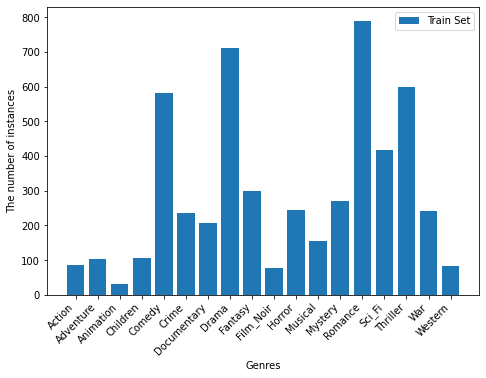

In [44]:
# visualization of genre distribution in training data
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
genre = genres.keys()
train = genres.values()
ax.bar(genre, train)
ax.set_xticklabels(genre, rotation=45, ha="right")
plt.legend(["Train Set"])
plt.xlabel("Genres")
plt.ylabel("The number of instances")
plt.show()
